In [2]:
import pandas as pd
df = pd.read_csv('Heart Attack.csv')

C:\Users\claud\AppData\Local\Temp\ipykernel_12576\2592648142.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df.dtypes

age               int64
gender            int64
impulse           int64
pressurehigh      int64
pressurelow       int64
glucose         float64
kcm             float64
troponin        float64
class            object
dtype: object

In [4]:
df['class'] = df['class'].apply(lambda x: 1 if x == 'positive' else 0)

In [5]:
df.dtypes

age               int64
gender            int64
impulse           int64
pressurehigh      int64
pressurelow       int64
glucose         float64
kcm             float64
troponin        float64
class             int64
dtype: object

In [6]:
# Calcolo della matrice di correlazione
corr_matrix = df.corr()

# Stampa della matrice di correlazione
print(corr_matrix)

                   age    gender   impulse  pressurehigh  pressurelow  \
age           1.000000 -0.092874 -0.023440      0.017441     0.002614   
gender       -0.092874  1.000000 -0.026781      0.011065    -0.009370   
impulse      -0.023440 -0.026781  1.000000      0.010882     0.108353   
pressurehigh  0.017441  0.011065  0.010882      1.000000     0.586166   
pressurelow   0.002614 -0.009370  0.108353      0.586166     1.000000   
glucose      -0.004193  0.006668 -0.019584      0.020807    -0.025614   
kcm           0.018419  0.017527 -0.013001     -0.016396    -0.023403   
troponin      0.088800  0.065793  0.011180      0.043729     0.043360   
class         0.238097  0.094432  0.006920     -0.020825    -0.009659   

               glucose       kcm  troponin     class  
age          -0.004193  0.018419  0.088800  0.238097  
gender        0.006668  0.017527  0.065793  0.094432  
impulse      -0.019584 -0.013001  0.011180  0.006920  
pressurehigh  0.020807 -0.016396  0.043729 -0.020

In [7]:
variabili_numeriche = list(df.columns[:-1])
print(variabili_numeriche)

['age', 'gender', 'impulse', 'pressurehigh', 'pressurelow', 'glucose', 'kcm', 'troponin']


In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[variabili_numeriche])
scaled_data # nuovo dataset con standardizzate le colonne

array([[ 5.72357956e-01,  7.18395402e-01, -2.39032215e-01, ...,
         1.78459449e-01, -2.90961900e-01, -3.02342376e-01],
       [-2.57963993e+00,  7.18395402e-01,  3.03491001e-01, ...,
         1.99434379e+00, -1.84072428e-01,  6.05700979e-01],
       [-8.73625310e-02,  7.18395402e-01, -2.77783874e-01, ...,
         1.64718943e+00, -2.86859072e-01, -3.10140458e-01],
       ...,
       [-8.20385295e-01,  7.18395402e-01,  1.29108539e-01, ...,
        -6.76074358e-01, -3.03054447e-01,  3.36968791e+00],
       [-1.60664807e-01,  7.18395402e-01, -3.94038849e-01, ...,
         3.95710113e+00, -2.04586569e-01, -1.68298262e-03],
       [-3.80571637e-01,  7.18395402e-01,  3.03491001e-01, ...,
        -1.68694910e-01,  7.69079350e-01,  1.22088302e+00]])

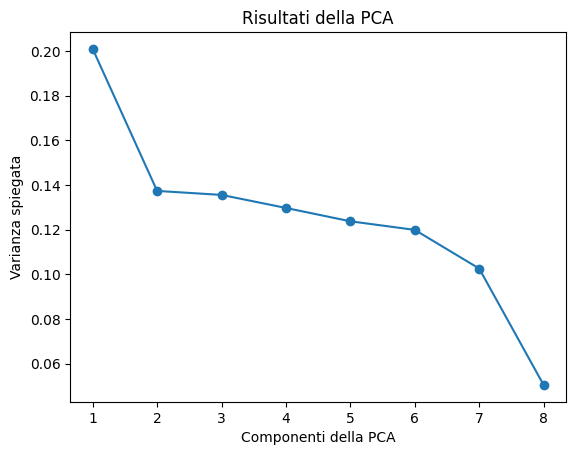

In [9]:
import matplotlib.pyplot as plt

pca = PCA().fit(scaled_data)

# Crea un grafico della varianza spiegata per ogni componente
plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Componenti della PCA')
plt.ylabel('Varianza spiegata')
plt.title("Risultati della PCA")
plt.show()

In [10]:
# Applica la PCA per ridurre la dimensionalità dei dati
pca = PCA(n_components=6).fit(scaled_data)
pca_data = pca.transform(scaled_data)
# Quantifichiamo la percentuale di varianza spiegata da ciascuno delle componenti.
print(pca.explained_variance_ratio_)

[0.20085971 0.1373117  0.13552059 0.12968404 0.12371433 0.11986677]


In [11]:
pc_df = pd.DataFrame(abs(pca.components_[:6]), columns=df.columns[:-1],
                     index=['PC1','PC2','PC3','PC4','PC5','PC6'])
pc_df

,age,gender,impulse,pressurehigh,pressurelow,glucose,kcm,troponin
PC1,0.031603,0.000850,0.139594,0.688797,0.700481,0.010782,0.051289,0.107946
PC2,0.794238,0.445245,0.103056,0.021313,0.046221,0.079372,0.072152,0.382394
PC3,0.009399,0.601137,0.320653,0.060226,0.038934,0.444515,0.322382,0.478602
PC4,0.045179,0.331561,0.148307,0.109222,0.056611,0.470682,0.591574,0.528578
PC5,0.045445,0.000133,0.891735,0.160089,0.028870,0.214580,0.282456,0.224624
PC6,0.138583,0.198421,0.018544,0.000507,0.038496,0.715048,0.653664,0.032038


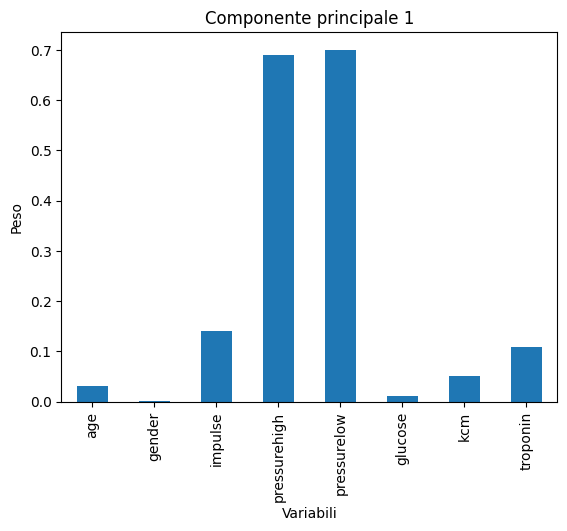

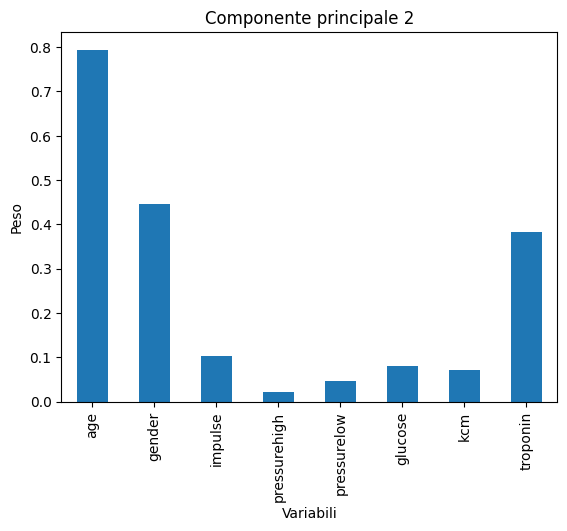

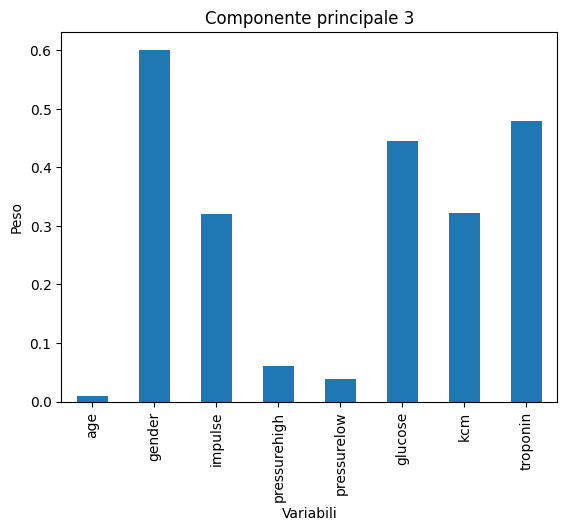

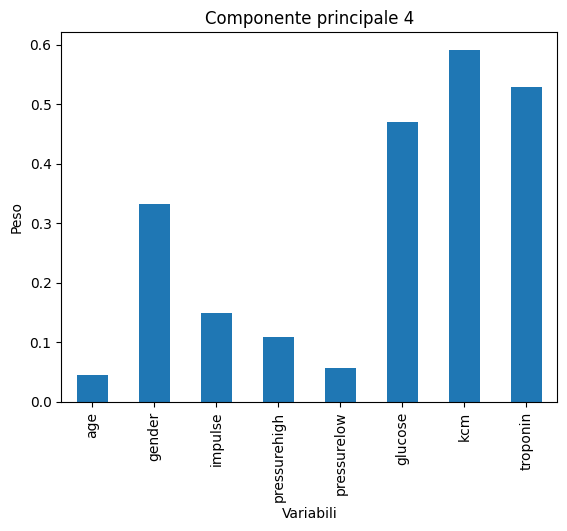

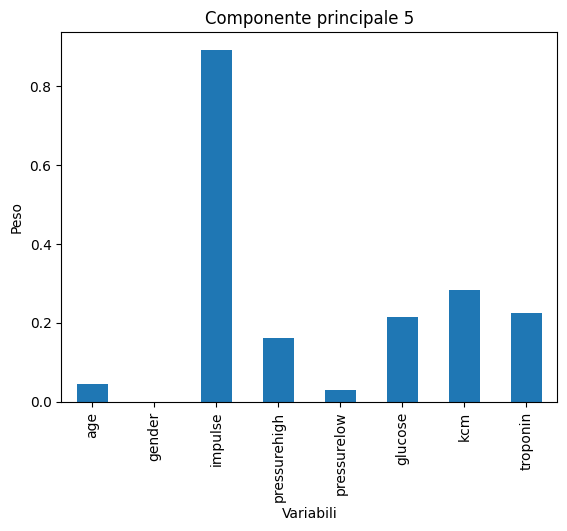

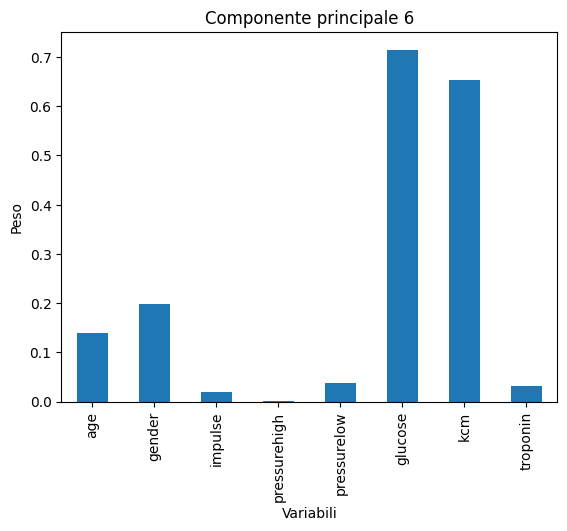

In [12]:
for i in range(6):
    ax = pc_df.iloc[i].plot(kind='bar')
    ax.set_xlabel('Variabili')
    ax.set_ylabel('Peso')
    ax.set_title('Componente principale {}'.format(i+1))
    plt.show()

In [13]:
# crea un nuovo dataframe con le componenti principali
df_pca = pd.DataFrame(data = pca_data, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])

# aggiungi la colonna target al nuovo dataframe
df_pca['target'] = df['class']

In [14]:
from sklearn.model_selection import train_test_split

# Supponendo che l'ultima colonna contenga l'etichetta di classe
X_train, X_test, y_train, y_test = train_test_split(df_pca.iloc[:, :-1], df_pca.iloc[:, -1], test_size=0.3, random_state=42)

In [ ]:
# Standardizza i dati
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
import keras
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(16, input_shape=(6,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

keras.utils.plot_model(model, show_shapes=True)

AttributeError: partially initialized module 'keras.src' has no attribute 'utils' (most likely due to a circular import)

In [22]:
# Train the model
model.fit(X_train_scaled, y_train, epochs=200, batch_size=5, verbose=1, validation_data=(X_test, y_test))


# Evaluate the model on the test set
score = model.evaluate(X_test_scaled, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

NameError: name 'model' is not defined

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Fai le predizioni sul set di test
y_pred = model.predict(X_test_scaled)
y_pred_binary = np.round(y_pred)

# Calcola la matrice di confusione
cm = confusion_matrix(y_test, y_pred_binary)

# Stampa la matrice di confusione
print("Matrice di Confusione:")
print(cm)

In [ ]:
# Fai le predizioni sul set di test
y_pred = model.predict(X_test_scaled)
y_pred_binary = (y_pred > 0.5).astype(int)  # Applica l'arrotondamento manualmente

# Calcola e stampa le metriche
print(f'Accuracy: {accuracy_score(y_true, y_pred_binary)}')
print(f'Precision: {precision_score(y_true, y_pred_binary)}')
print(f'Recall: {recall_score(y_true, y_pred_binary)}')
print(f'F1-score: {f1_score(y_true, y_pred_binary)}')